# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item"><a href="#Subject-of-linear-algebra" data-toc-modified-id="Subject-of-linear-algebra-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Subject of linear algebra</a></div><div class="lev2 toc-item"><a href="#Examples-of-vectors-and-matrices" data-toc-modified-id="Examples-of-vectors-and-matrices-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examples of vectors and matrices</a></div><div class="lev3 toc-item"><a href="#Design-matrix" data-toc-modified-id="Design-matrix-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Design matrix</a></div><div class="lev3 toc-item"><a href="#Grayscale-images" data-toc-modified-id="Grayscale-images-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Grayscale images</a></div><div class="lev3 toc-item"><a href="#Color-images" data-toc-modified-id="Color-images-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Color images</a></div><div class="lev3 toc-item"><a href="#Text-data" data-toc-modified-id="Text-data-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Text data</a></div><div class="lev3 toc-item"><a href="#Networks" data-toc-modified-id="Networks-125"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Networks</a></div><div class="lev1 toc-item"><a href="#snap-web-google" data-toc-modified-id="snap-web-google-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SNAP/web-Google</a></div><div class="lev2 toc-item"><a href="#A-view-of-statistics-(or-data-science)" data-toc-modified-id="A-view-of-statistics-(or-data-science)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A view of statistics (or data science)</a></div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2022fall/slides/01-intro`


In [2]:
using GraphPlot, Graphs, ImageCore, ImageIO, ImageMagick, ImageShow, 
    LinearAlgebra, MatrixDepot, MLDatasets, QuartzImageIO, 
    RDatasets, StatsModels, TextAnalysis

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/MatrixDepot.jl:118
┌ Info: reading database
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/huazhou/.julia/packages/MatrixDepot/T9mnt/src/MatrixDepot.jl:120


# Introduction

## Subject of linear algebra

- Vector $\mathbf{x} \in \mathbb{R}^{n}$:
$$
  \mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}.
$$

- Matrix $\mathbf{X} = (x_{ij}) \in \mathbb{R}^{m \times n}$:
$$
  \mathbf{X} = \begin{pmatrix}
  x_{11} & \cdots & x_{1n} \\
  \vdots & \ddots & \vdots \\
  x_{m1} & \cdots & x_{mn}
  \end{pmatrix}.
$$


## Examples of vectors and matrices

### Design matrix

In statistics, tabular data is often summarized by a **predictor matrix** or **covariate matrix** or **design matrix** or **feature matrix**, which is denoted by $\mathbf{X}$ by convention. Each row of the feature matrix is an observation, and each column is a covariate/measurement/feature.

The famous [Fisher's Iris data](https://en.wikipedia.org/wiki/Iris_flower_data_set):

In [3]:
# the famous Fisher's Iris data
# <https://en.wikipedia.org/wiki/Iris_flower_data_set>
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


We can turn a tabular data set into a feature matrix according to a model formula:

In [4]:
# use full dummy coding (one-hot coding) for categorical variable Species
iris_X = ModelMatrix(ModelFrame(
    @formula(1 ~ 1 + SepalLength + SepalWidth + PetalLength + PetalWidth + Species), 
    iris,
    contrasts = Dict(:Species => StatsModels.FullDummyCoding()))).m

150×8 Matrix{Float64}:
 1.0  5.1  3.5  1.4  0.2  1.0  0.0  0.0
 1.0  4.9  3.0  1.4  0.2  1.0  0.0  0.0
 1.0  4.7  3.2  1.3  0.2  1.0  0.0  0.0
 1.0  4.6  3.1  1.5  0.2  1.0  0.0  0.0
 1.0  5.0  3.6  1.4  0.2  1.0  0.0  0.0
 1.0  5.4  3.9  1.7  0.4  1.0  0.0  0.0
 1.0  4.6  3.4  1.4  0.3  1.0  0.0  0.0
 1.0  5.0  3.4  1.5  0.2  1.0  0.0  0.0
 1.0  4.4  2.9  1.4  0.2  1.0  0.0  0.0
 1.0  4.9  3.1  1.5  0.1  1.0  0.0  0.0
 1.0  5.4  3.7  1.5  0.2  1.0  0.0  0.0
 1.0  4.8  3.4  1.6  0.2  1.0  0.0  0.0
 1.0  4.8  3.0  1.4  0.1  1.0  0.0  0.0
 ⋮                        ⋮         
 1.0  6.0  3.0  4.8  1.8  0.0  0.0  1.0
 1.0  6.9  3.1  5.4  2.1  0.0  0.0  1.0
 1.0  6.7  3.1  5.6  2.4  0.0  0.0  1.0
 1.0  6.9  3.1  5.1  2.3  0.0  0.0  1.0
 1.0  5.8  2.7  5.1  1.9  0.0  0.0  1.0
 1.0  6.8  3.2  5.9  2.3  0.0  0.0  1.0
 1.0  6.7  3.3  5.7  2.5  0.0  0.0  1.0
 1.0  6.7  3.0  5.2  2.3  0.0  0.0  1.0
 1.0  6.3  2.5  5.0  1.9  0.0  0.0  1.0
 1.0  6.5  3.0  5.2  2.0  0.0  0.0  1.0
 1.0  6.2  3.4  5.4 

### Grayscale images

Neural networks can classify handwritten digits in high accuracy. Each handwritten digit is represented by a grayscale image. The famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data set contains 60,000 training images and 10,000 test images. Each image is a $28 \times 28$ matrix:

In [5]:
# first training sample: image, digit label
# MNIST.traindata(1)
MNIST(split=:train)[1]

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = 5)

In [6]:
# first training digit
X = MNIST(split=:train)[1][1]

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

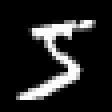

In [7]:
# apparently it's digit 5
convert2image(MNIST, X)

### Color images

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a collection of 50,000 training images and 10,000 test images, each belonging to 1 of 10 mutually exclusive classes (frog, truck, ...). Each color image is represented by three channels: R (red), G (green), B (blue). Each channel is a $32 \times 32$ intensity matrix.

In [8]:
# 2nd training image in CIFAR10
X = CIFAR10(split=:train)[2].features

32×32×3 Array{Float32, 3}:
[:, :, 1] =
 0.603922  0.54902   0.54902   0.533333  …  0.686275   0.647059   0.639216
 0.494118  0.568627  0.545098  0.537255     0.611765   0.611765   0.619608
 0.411765  0.490196  0.45098   0.478431     0.603922   0.623529   0.639216
 0.4       0.486275  0.576471  0.517647     0.576471   0.513726   0.568627
 0.490196  0.588235  0.541176  0.592157     0.607843   0.368627   0.168627
 0.607843  0.596078  0.517647  0.709804  …  0.631373   0.4        0.0745098
 0.67451   0.682353  0.666667  0.796078     0.627451   0.423529   0.0784314
 0.705882  0.698039  0.698039  0.815686     0.654902   0.501961   0.290196
 0.556863  0.52549   0.670588  0.815686     0.647059   0.603922   0.52549
 0.435294  0.431373  0.752941  0.796078     0.596078   0.611765   0.466667
 0.415686  0.521569  0.858824  0.701961  …  0.639216   0.713726   0.431373
 0.427451  0.639216  0.917647  0.662745     0.643137   0.701961   0.388235
 0.482353  0.752941  0.898039  0.643137     0.521569   0.490

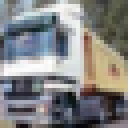

In [10]:
# is this a truck?
convert2image(CIFAR10, X)

### Text data

Text data (webpage, blog, twitter) can be transformed to numeric matrices for statistical analysis as well. For example, the 29 State of the Union Addresses by U.S. presidents, from George W Bush in 1989 to Donald Trump in 2017, can be represented by a $29 \times 9610$ **document term matrix**, where each row stands for one speech and each column is a word that ever appears in these speeches. An entry $x_{ij}$ of the matrix counts the number of occurrences of word $j$ in speech $i$.

In [11]:
sotupath = joinpath(dirname(pathof(TextAnalysis)), "..", "test/data/sotu")
Base.Filesystem.readdir(sotupath)

29-element Vector{String}:
 "Bush_1989.txt"
 "Bush_1990.txt"
 "Bush_1991.txt"
 "Bush_1992.txt"
 "Bush_2001.txt"
 "Bush_2002.txt"
 "Bush_2003.txt"
 "Bush_2004.txt"
 "Bush_2005.txt"
 "Bush_2006.txt"
 "Bush_2007.txt"
 "Bush_2008.txt"
 "Clinton_1993.txt"
 ⋮
 "Clinton_1998.txt"
 "Clinton_1999.txt"
 "Clinton_2000.txt"
 "Obama_2009.txt"
 "Obama_2010.txt"
 "Obama_2011.txt"
 "Obama_2012.txt"
 "Obama_2013.txt"
 "Obama_2014.txt"
 "Obama_2015.txt"
 "Obama_2016.txt"
 "Trump_2017.txt"

In [12]:
crps = DirectoryCorpus(sotupath)
# Donald Trump 2017 SOTU address
text(crps[29])

"Thank you very much. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America: Tonight, as we mark the conclusion of our celebration of Black History Month, we are reminded of our Nation's path towards civil righ" ⋯ 28704 bytes ⋯ "n me in dreaming big and bold, and daring things for our country. I am asking everyone watching tonight to seize this moment. Believe in yourselves, believe in your future, and believe, once more, in America.\n\nThank you, God bless you, and God bless the United States.\n"

In [13]:
standardize!(crps, StringDocument)
remove_case!(crps)
prepare!(crps, strip_punctuation)
update_lexicon!(crps)
update_inverse_index!(crps)
m = DocumentTermMatrix(crps)
D = dtm(m, :dense)

29×9610 Matrix{Int64}:
 3  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  1  0   0   0
 3  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  1  0   0   0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  1  0   0   0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0   0   0
 2  8  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  5  …  0  1  0  0  0  0  0  0  0   0   0
 0  2  0  2  0  0  0  0  0  0  0  1  3     0  0  0  0  0  0  0  0  0   0   0
 0  2  1  0  0  0  0  0  0  0  0  0  5     0  0  0  0  0  0  0  0  0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  1     1  0  0  0  0  0  0  0  0   0   0
 0  1  0  0  0  0  0  0  0  0  0  0  2     1  0  1  0  1  0  0  0  0  67  31
 1  1  1  0  0  0  0  0  0  0  0  0  2  …  1  0  0  0  0  0  0  0  0   0   0
 1  0  1  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0   0   0
 2  6  1  0  0  2  0  0  0  0  0  0  0     0  0  0  0

In [14]:
m.terms

9610-element Vector{String}:
 "1"
 "10"
 "100"
 "1000"
 "10000"
 "100000"
 "1010"
 "102"
 "103"
 "104"
 "105"
 "108"
 "11"
 ⋮
 "zarfos"
 "zarqawi"
 "zero"
 "zeroemission"
 "zeros"
 "zimbabwe"
 "zion"
 "zone"
 "zones"
 "ј"
 "–"
 "…"

### Networks

The world wide web (WWW) with $n$ webpages can be described by a **connectivity matrix** or **adjacency matrix** $\mathbf{A} \in \{0,1\}^{n \times n}$ with entry
\begin{eqnarray*}
    a_{ij} = \begin{cases}
    1 & \text{if page $i$ links to page $j$} \\
    0 & \text{otherwise}
    \end{cases}.
\end{eqnarray*}
According to [Internet Live Stats](https://www.internetlivestats.com/total-number-of-websites/), $n \approx 1.98$ billion now. The smaller [SNP/web-Google](https://snap.stanford.edu/data/web-Google.html) data set contains a web of 916,428 pages.

In [15]:
mdinfo("SNAP/web-Google") |> show

# SNAP/web-Google

###### MatrixMarket matrix coordinate pattern general

---

  * UF Sparse Matrix Collection, Tim Davis
  * http://www.cise.ufl.edu/research/sparse/matrices/SNAP/web-Google
  * name: SNAP/web-Google
  * [Web graph from Google]
  * id: 2301
  * date: 2002
  * author: Google
  * ed: J. Leskovec
  * fields: name title A id date author ed kind notes
  * kind: directed graph

---

  * notes:
  * Networks from SNAP (Stanford Network Analysis Platform) Network Data Sets,
  * Jure Leskovec http://snap.stanford.edu/data/index.html
  * email jure at cs.stanford.edu
  * 
  * Google web graph
  * 
  * Dataset information
  * 
  * Nodes represent web pages and directed edges represent hyperlinks between them.
  * The data was released in 2002 by Google as a part of Google Programming
  * Contest.
  * 
  * Dataset statistics
  * Nodes   875713
  * Edges   5105039
  * Nodes in largest WCC    855802 (0.977)
  * Edges in largest WCC    5066842 (0.993)
  * Nodes in largest SCC    43481

In [16]:
md = mdopen("SNAP/web-Google")
md.A

916428×916428 SparseArrays.SparseMatrixCSC{Bool, Int64} with 5105039 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

Here is a visulization of the SNAP/web-Google network

<img src="http://yifanhu.net/GALLERY/GRAPHS/GIF_SMALL/SNAP@web-Google.gif" width=400 align="center"/>

Such a directed graph can also be represented by an **indicence matrix** $\mathbf{B} \in \{-1,0,1\}^{m \times n}$ where $m$ is the number of verticies and $n$ is the number of edges. The entries of an incidence matrix are
\begin{eqnarray*}
    b_{ij} = \begin{cases}
    -1 & \text{if edge $j$ starts at vertex $i$} \\
    1 & \text{if edge $j$ ends at vertex $i$} \\
    0 & \text{otherwise}
    \end{cases}.
\end{eqnarray*}

Here is a directed graph with 4 nodes and 5 edges.

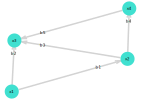

In [17]:
# a simple directed graph on GS p16
g = SimpleDiGraph(4)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 2, 3)
add_edge!(g, 2, 4)
add_edge!(g, 4, 3)
gplot(g, nodelabel=["x1", "x2", "x3", "x4"], edgelabel=["b1", "b2", "b3", "b4", "b5"])

In [18]:
# adjacency matrix A
convert(Matrix{Int64}, adjacency_matrix(g))

4×4 Matrix{Int64}:
 0  1  1  0
 0  0  1  1
 0  0  0  0
 0  0  1  0

In [19]:
# incidence matrix B
convert(Matrix{Int64}, incidence_matrix(g))

4×5 Matrix{Int64}:
 -1  -1   0   0   0
  1   0  -1  -1   0
  0   1   1   0   1
  0   0   0   1  -1

## A view of statistics (or data science)

[XKCD #1838](https://xkcd.com/1838/)

<img src="https://imgs.xkcd.com/comics/machine_learning_2x.png" width=400 align="center"/>